
# <center> Electron Spin Resonance Lab Notebook </center>
## <center> Adithya Shastry </center>
## <center> May 2nd, 2020 </center>

In this Lab Notebook I will be analyzing the Electron Spin Resonance Data. Through this experiment we will try to detect and Characterize the spin of electrons in the molecule DDPH. This will be done through the Continuous Wave method since it is the simplest method used to detect the resonance of electrons. The steps taken in this Lab Notebook are in accordance with the steps for analysis detailed in the lab manual for this particular experiment as written by Professor Conover. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Linear Regression

In [12]:
def linearRegression(x,y):
    '''this function will take as an input two 1D numpy arrays and
    will output the linear regression model with errors. 
    This will output the following Tuple: (slope,intercept,slopeError,InterceptError)'''
    #First we will calculate X,Z,N,Y,B
    N=x.size
    Z=(x**2).sum()
    X=x.sum()
    Y=y.sum()
    B=(x*y).sum()
    delta=(N*Z)-(X**2)
    #Now calculate m and b
    m=(N*B-X*Y)/delta
    b=(Z*Y-X*B)/delta
    #now calculate the errors
    predicts=m*x+b
    errorSquared=(y-predicts)**2
    errorSquaredSum=errorSquared.sum()
    sigmaSquared=errorSquaredSum/N
    m_error=np.sqrt((N*sigmaSquared)/delta)
    b_error=np.sqrt((Z*sigmaSquared)/delta)
    return m,b,m_error,b_error

### Resonance Frequencies
First we, will read in the the Resonance Frequencies data and do a linear regression on it. I have separated the data into different sheets to make it easier to read in.

In [13]:
ResFreq=pd.read_excel("ESRExperimentalData 2020-04-24.xlsx",sheet_name="Sheet1",header=0)
ResFreq.columns=['Frequency(MHz)','IDC(A)']



ResFreq.head(10)

,Frequency(MHz),IDC(A)
0,15.6,0.144
1,22.4,0.207
2,29.8,0.274
3,29.5,0.273
4,35.5,0.322
5,45.1,0.424
6,58.8,0.551
7,60.8,0.546
8,70.1,0.653
9,70.2,0.632


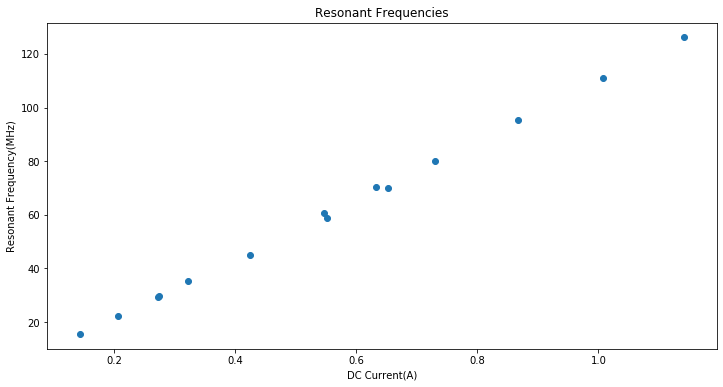

In [24]:
#We can quickly plot this data
plt.figure(figsize=[12,6])
plt.scatter(ResFreq['IDC(A)'],ResFreq['Frequency(MHz)'])
plt.ylabel("Resonant Frequency(MHz)")
plt.xlabel("DC Current(A)")
plt.title("Resonant Frequencies")
plt.show()


Now we can run a linear regression on this data and include it in the plot above.

In [15]:
m,b,m_error,b_error=linearRegression(ResFreq['IDC(A)'],ResFreq['Frequency(MHz)'])
print("The slope is "+str(m)+" with error "+str(m_error))
print("\n")
print("The intercept is "+ str(b)+ " with error "+str(b_error))

The slope is 110.70224366204194 with error 0.707655153645856


The intercept is -0.7269884100992928 with error 0.4446230129740963


From the result above, it is clear that the linear regression has picked up an intercept that we cannot dismiss. The intercept is most likely the cause of some sort of offset in the magnetic field, which we will calculate below.

We will plot the data again, with the linear regression

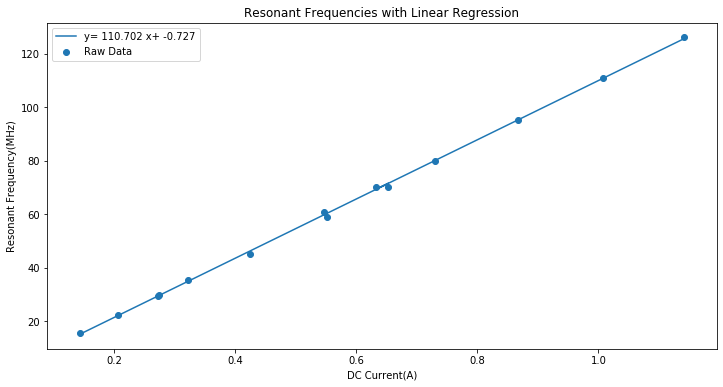

In [25]:
pred=ResFreq['IDC(A)']*m+b

plt.figure(figsize=[12,6])
plt.scatter(ResFreq['IDC(A)'],ResFreq['Frequency(MHz)'],label='Raw Data')
plt.plot(ResFreq['IDC(A)'],pred,label='y= '+str(round(m,3))+" x+ "+str(round(b,3)))
plt.ylabel("Resonant Frequency(MHz)")
plt.xlabel("DC Current(A)")
plt.title("Resonant Frequencies with Linear Regression")
plt.legend()
plt.show()

### Calculate the $R_B$ factor and the offset
Next, we will use magnetic field measurements made to understand how the Magnetic field relates to the DC Current. With this we will be able to relate the $B$ to the $I_{DC}$ as shown below.

<center>$B=R_BI_{DC}$</center>

In [17]:
#First import the Magnetic field data
Bmeas=pd.read_excel("ESRExperimentalData 2020-04-24.xlsx",sheet_name="Sheet2",header=0)
Bmeas.columns=['IDC(A)','B(mT)']


Bmeas.head()

,IDC(A),B(mT)
0,0.000,0.01
1,0.124,0.48
2,0.251,0.98
3,0.378,1.48
4,0.523,2.09


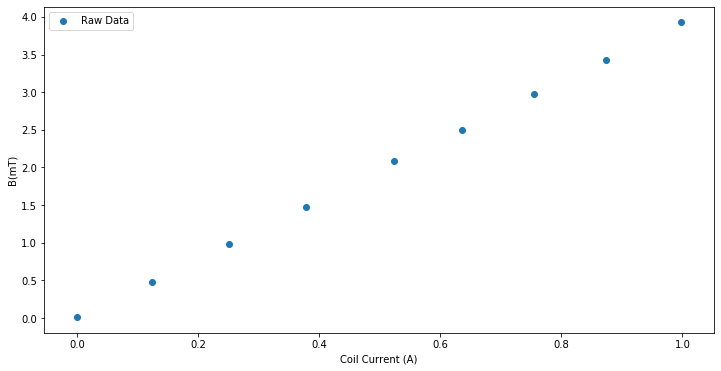

In [18]:
plt.figure(figsize=[12,6])
plt.scatter(Bmeas['IDC(A)'],Bmeas['B(mT)'],label='Raw Data')
plt.ylabel("B(mT)")
plt.xlabel("Coil Current (A)")
plt.legend()
plt.show()

We can now take a linear Regression of this data to find the $R_B$ factor and the $B_{\text{offset}}$ factor

In [40]:
Rb,B_off,RbE,B_offE=linearRegression(Bmeas['IDC(A)'],Bmeas["B(mT)"])
Rb=Rb*10
RbE=RbE*10
print("The R_b is "+str(Rb)+" with error "+str(RbE))
print("\n")
print("The B_offset is "+ str(B_off)+ " with error "+str(B_offE))


The R_b is 39.374471856337344 with error 0.12622505038411672


The B_offset is 0.0006446798644170214 with error 0.0075564773977669485


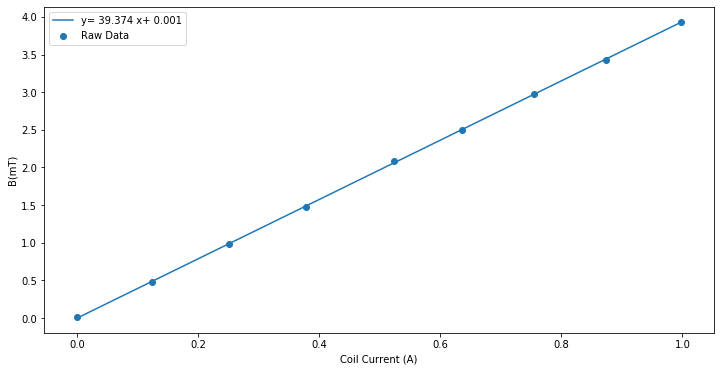

In [41]:
#We can do a quick plot with the Linear Regression

plt.figure(figsize=[12,6])
plt.scatter(Bmeas['IDC(A)'],Bmeas['B(mT)'],label='Raw Data')
plt.plot(Bmeas["IDC(A)"],(Rb/10)*Bmeas["IDC(A)"]+B_off,label='y= '+str(round(Rb,3))+" x+ "+str(round(B_off,3)))
plt.ylabel("B(mT)")
plt.xlabel("Coil Current (A)")
plt.legend()
plt.show()

As explained above, the intercept in the Resonant Frequency graph can be explained by the $B_{\text{offset}}$ we just measured above. 

We need to now adjust the error in $R_B$ factor to account for the imprecision in the angle the detector was placed and the error in the device's reading as well. This totals to be 0.2% for the probe calibrartion and 0.4% for errors in aligning the detector. This can be calculated using the formula

<center>$\frac{\sigma_{R_b}}{R_B}=\sqrt{0.002^2+0.004^2+R_{b_\text{error}}^2}$</center>



In [42]:
RbE=np.sqrt((RbE/Rb)**2+0.002**2+0.004**2)

print("This makes the Error in R_b "+str(RbE))

This makes the Error in R_b 0.005502443818447183


With this we can calculate the $g_s$ value and its error using the following formula and the slope from the Resonant Frequencies Graph above. This will be done with the following equation which has been modified to handle the $B_{\text{offset}}$



<center>$\nu_{s}=g_s\frac{\mu_{b}}{h}R_B I_{DC}+g_s\frac{\mu_{b}}{h}B_{\text{offset}}$</center>

From this equation we can see that the slope of the Resonant Frequencies graph,$m=g_s\frac{\mu_{b}}{h}R_B$. We can rearrange this to solve for $g_s=\frac{m}{\frac{\mu_B}{h}R_b}$. Where $\frac{\mu_B}{h}=1.39962449361 $. 

We can handle the error using the following equation

<center> $\sigma_{g_s}=g_s\sqrt{(\frac{\sigma_m}{m})^2+(\frac{\sigma_{R_B}}{R_B})^2}$</center>

The acepted value for the $g_s=2.002 319 304 362 56 $. This was taken from the lab manual

In [52]:
mu=1.39962449361

gs=m/((mu)*Rb)

print("The value for g_s is "+str(round(gs,2)))

gsE= gs*np.sqrt((m_error/m)**2+(RbE)**2)

print("The error in g_s is "+str(round(gsE,2)))

acceptedgs=2.00231930436256


error=((gs-acceptedgs)/acceptedgs)*100

print("The gs value measured deviates from the accepted value "+str(round(error,2))+"%")

The value for g_s is 2.01
The error in g_s is 0.02
The gs value measured deviates from the accepted value 0.32%


As can be seen above this makes the $g_s=2.01 \pm 0.02$ which deviates from the accepted value by 0.32%.